# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
df = pd.read_csv("data/mini.csv")
df.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

# 결측치 확인
non-null 이 모두 10000 개로 결측치 없음

In [230]:
df.sort_values("user_id")

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
8254,00030dc2,18,28,19.907622,11.373221,10,15,61.765132,2,5,Low,Premium,2,3,0
1061,00058702,12,28,14.201342,25.325044,10,13,84.676719,8,5,Medium,Premium,0,6,1
8486,00076619,3,28,13.692835,6.452196,19,17,78.995991,4,2,High,Basic,2,6,1
3455,000a7fac,10,29,16.608599,94.417871,4,17,75.712102,4,5,Low,Premium,2,3,0
3865,00109fa1,11,24,21.025350,5.188833,19,12,73.553634,4,5,High,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,ffcca840,19,2,15.904005,86.440590,10,14,74.699637,1,5,Low,Premium,3,3,0
8154,ffe5da30,12,12,7.324985,79.807193,15,15,70.224840,3,5,Low,Basic,7,7,1
5181,fff20cbb,6,15,12.768458,48.325353,10,12,69.129113,7,4,Low,Basic,2,5,0
5659,fff3144f,10,1,12.467311,5.454073,10,15,55.267751,5,4,Medium,Premium,2,0,1


# 전체 데이터
* 지난 2년간의 데이터

# user_id
* 8개 문자열 : 순서대로 생성 되었을 가능성 있음
* 하나씩 되어있는 것 각각 다른 유저 

In [232]:
df["user_id"].sort_values()

8254    00030dc2
1061    00058702
8486    00076619
3455    000a7fac
3865    00109fa1
          ...   
6102    ffcca840
8154    ffe5da30
5181    fff20cbb
5659    fff3144f
2738    ffff071d
Name: user_id, Length: 10000, dtype: object

# subscription_duration 
* 사용자가 서비스에 가입한 기간 (월)
* 최소 1 : 이번달 가입자 또는 저번달 가입자
* 최대 23 : 2년간의 데이터로 보여서 저번달 가입자 까지 일 가능성 있음
* 각각의 분포는 크게 차이 나지 않는다.
* 평균 : 11.897400 , std : 6.600896

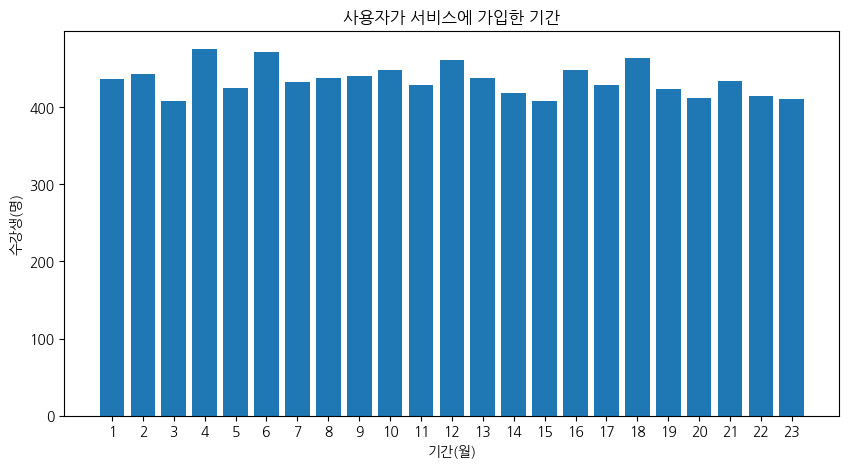

In [246]:
df['subscription_duration'].sort_values()
subscription_duration = df['subscription_duration'].value_counts().sort_index()

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(subscription_duration.index, subscription_duration.values)

#그래프 명
plt.title('사용자가 서비스에 가입한 기간')

#그래프 x축 레이블
plt.xlabel('기간(월)')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(subscription_duration.index)

#그래프 출력
plt.show()

# recent_login_time
* 사용자가 마지막으로 로그인한 시간 (일)
* 최소 1 : 어제일 가능성 있음
* 최대 29 : 한달간의 데이터로 보임
* 평균 15.013200 , std : 8.362573
* 각각의 분포는 크게 차이 나지 않는다.

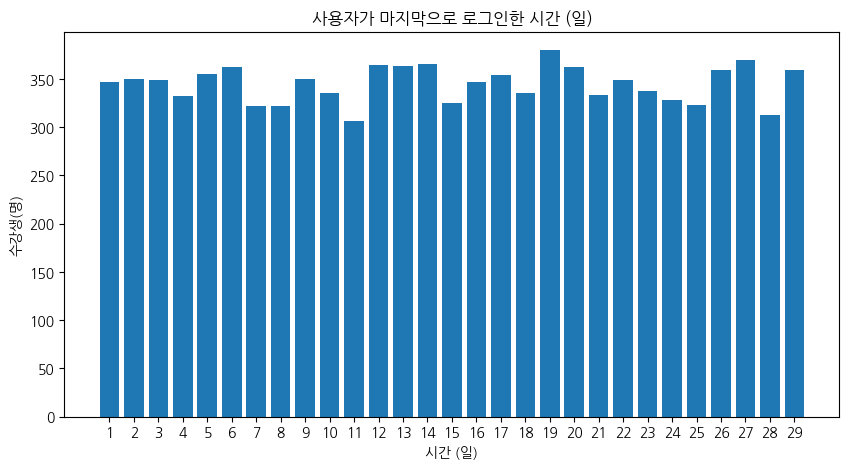

In [250]:
df['recent_login_time'].sort_values()
recent_login_time = df['recent_login_time'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(recent_login_time.index, recent_login_time.values)

#그래프 명
plt.title('사용자가 마지막으로 로그인한 시간 (일)')

#그래프 x축 레이블
plt.xlabel('시간 (일)')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(recent_login_time.index)

#그래프 출력
plt.show()

# average_login_time
* 사용자의 일반적인 로그인 시간
* 최소 2.366189 최대 26.998490
* 평균 14.994076 , std 3.001869

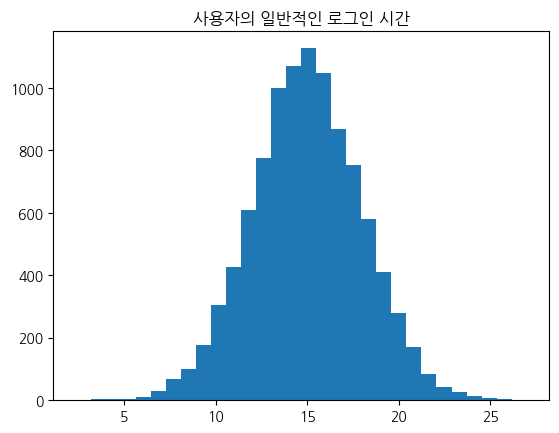

In [274]:
df['average_login_time'].sort_values()
average_login_time = df['average_login_time'].sort_values()

plt.title("사용자의 일반적인 로그인 시간")
plt.hist(average_login_time, bins=30)
plt.show()

# average_time_per_learning_session
* 각 학습 세션에 소요된 평균 시간 (분)
* 0 부터 503분까지
* 평균 54.917720 , std : 56.024310

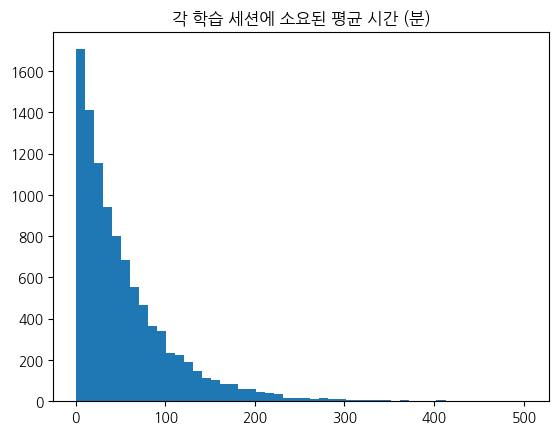

In [293]:
average_time_per_learning_session = df['average_time_per_learning_session'].sort_values()
plt.title("각 학습 세션에 소요된 평균 시간 (분)")
plt.hist(average_time_per_learning_session, bins=50)
plt.show()

# monthly_active_learning_days
* 월간 활동적인 학습 일수
* [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]

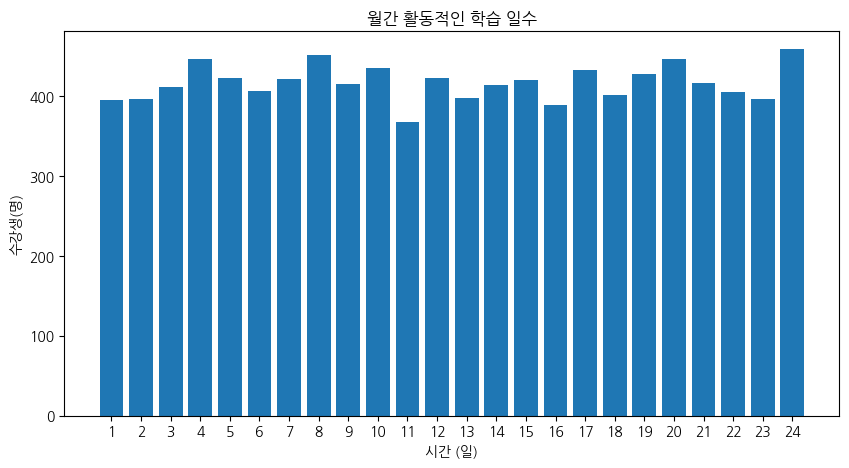

In [301]:
np.sort(df['monthly_active_learning_days'].unique())
monthly_active_learning_days = df['monthly_active_learning_days'].value_counts().sort_index()

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(monthly_active_learning_days.index, monthly_active_learning_days.values)

#그래프 명
plt.title('월간 활동적인 학습 일수')

#그래프 x축 레이블
plt.xlabel('시간 (일)')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(monthly_active_learning_days.index)

#그래프 출력
plt.show()

# total_completed_courses
* 완료한 총 코스 수
* [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
* 12    1105 에서 제일 큼

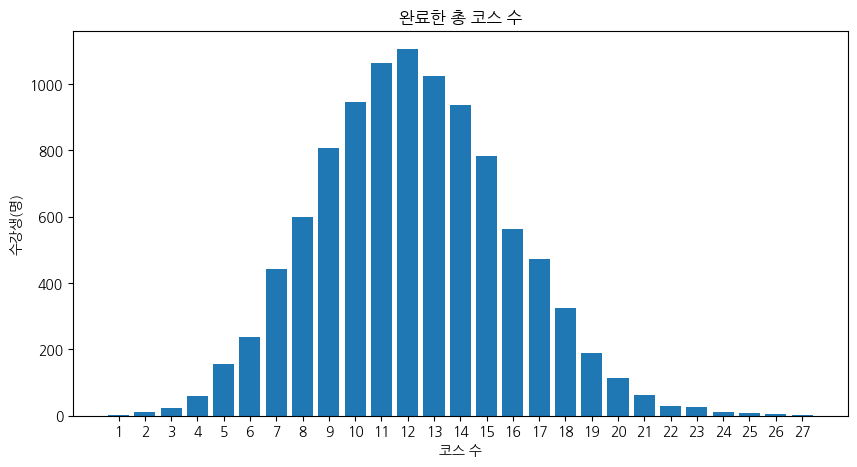

In [306]:
np.sort(df['total_completed_courses'].unique())
total_completed_courses = df['total_completed_courses'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(total_completed_courses.index, total_completed_courses.values)

#그래프 명
plt.title('완료한 총 코스 수')

#그래프 x축 레이블
plt.xlabel('코스 수')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(total_completed_courses.index)

#그래프 출력
plt.show()

# recent_learning_achievement
* 최근 학습 성취도
* 평균 : 75.029513 , std : 9.968529
* 최대가 100 을 넘는 것으로 보아 이상치인지 확인 필요

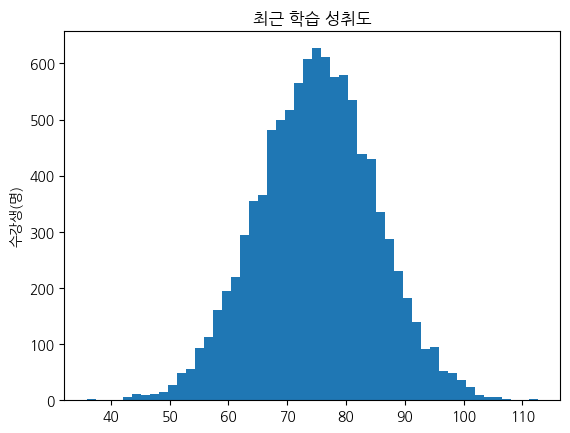

In [317]:
#df[df['recent_learning_achievement'] > 100]
plt.title("최근 학습 성취도")
plt.hist(df['recent_learning_achievement'], bins=50)
#그래프 y축 레이블
plt.ylabel('수강생(명)')
plt.show()


# abandoned_learning_sessions
* 중단된 학습 세션 수
* [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
* 2회에서 빈도 가장 높다. 2226 평균 : 3.043600 , std : 1.755052

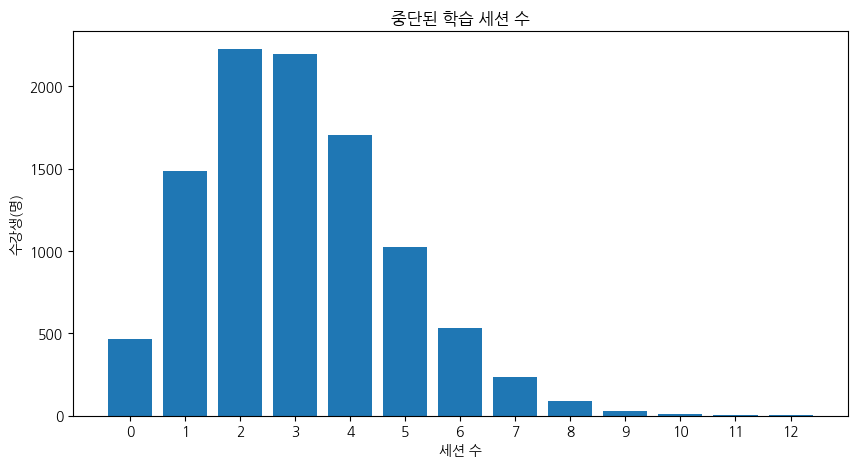

In [324]:
np.sort(df['abandoned_learning_sessions'].unique())
abandoned_learning_sessions=df['abandoned_learning_sessions'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(abandoned_learning_sessions.index, abandoned_learning_sessions.values)

#그래프 명
plt.title('중단된 학습 세션 수')

#그래프 x축 레이블
plt.xlabel('세션 수')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(abandoned_learning_sessions.index)

#그래프 출력
plt.show()

# community_engagement_level
* 커뮤니티 참여도
* [4, 3, 2, 5, 1]
* 참여도가 올라갈 수록 사람이 많다

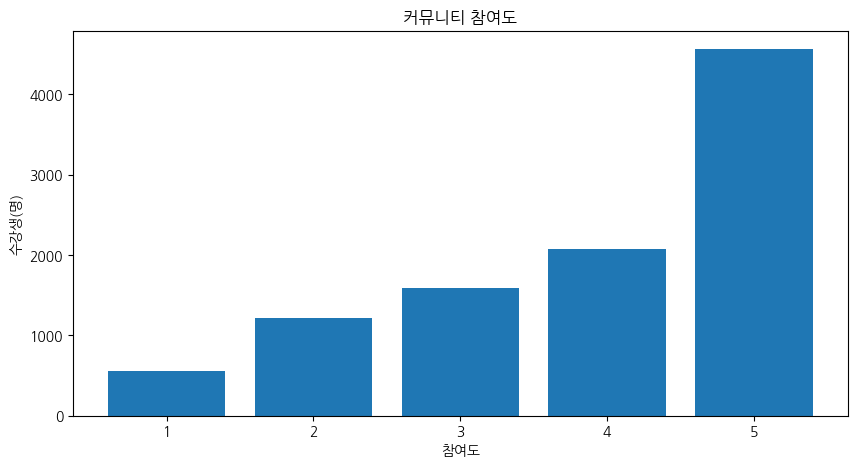

In [333]:
df['community_engagement_level'].unique()
community_engagement_level = df['community_engagement_level'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(community_engagement_level.index, community_engagement_level.values)

#그래프 명
plt.title('커뮤니티 참여도')

#그래프 x축 레이블
plt.xlabel('참여도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(community_engagement_level.index)

#그래프 출력
plt.show()

# preferred_difficulty_level
* 선호하는 난이도
* ['Low', 'Medium', 'High']
* 쉬울수록 더 좋아한다.
* Low : 4992, 
Medium:  300, 
Hi :   2000

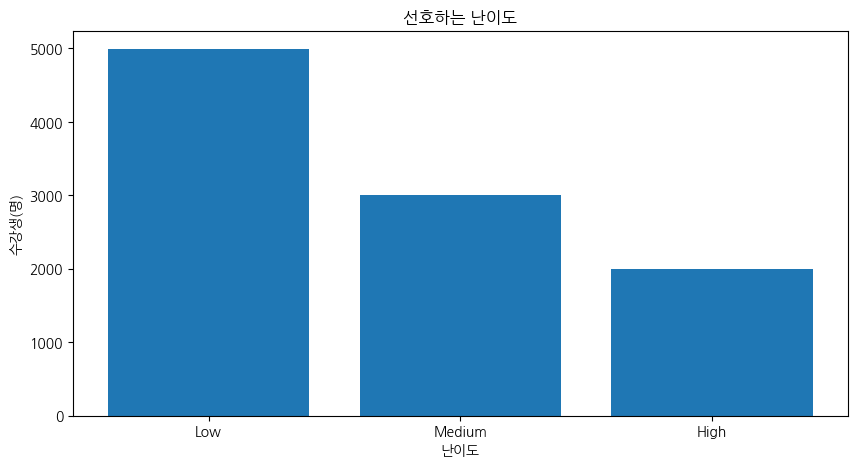

In [343]:
df['preferred_difficulty_level'].unique()
preferred_difficulty_level = df['preferred_difficulty_level'].value_counts()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(preferred_difficulty_level.index, preferred_difficulty_level.values)

#그래프 명
plt.title('선호하는 난이도')

#그래프 x축 레이블
plt.xlabel('난이도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(preferred_difficulty_level.index)

#그래프 출력
plt.show()

# subscription_type
* 구독 유형
* ['Basic', 'Premium']
* Basic 이 더 많음
* Basic : 5979, 
Premium :   4021

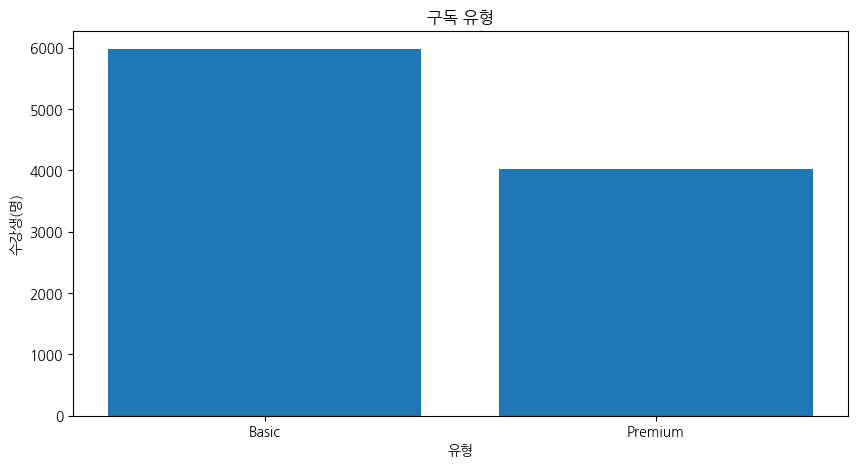

In [285]:
df['subscription_type'].unique()
subscription_type = df['subscription_type'].value_counts()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(subscription_type.index, subscription_type.values)

#그래프 명
plt.title('구독 유형')

#그래프 x축 레이블
plt.xlabel('유형')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(subscription_type.index)

#그래프 출력
plt.show()

# customer_inquiry_history
* 고객 문의 이력
* [ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10]
* 고객 문의가 1회가 제일많고 2회 순으로 점점줄어든다.

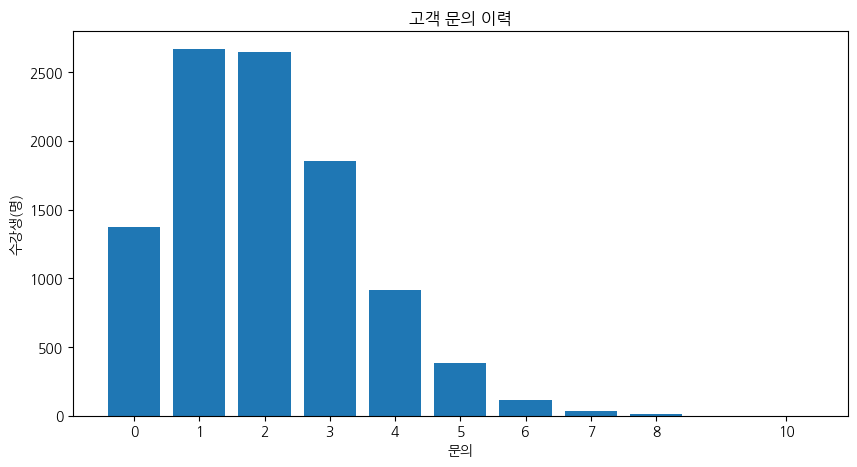

In [352]:
df['customer_inquiry_history'].unique()
customer_inquiry_history = df['customer_inquiry_history'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(customer_inquiry_history.index, customer_inquiry_history.values)

#그래프 명
plt.title('고객 문의 이력')

#그래프 x축 레이블
plt.xlabel('문의')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(customer_inquiry_history.index)

#그래프 출력
plt.show()

# payment_pattern
* 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
  * 7: 3개월 모두 결제함
  * 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
  * 5: 첫 달과 마지막 달에 결제함
  * 4: 첫 달에만 결제함
  * 3: 마지막 2개월에 결제함
  * 2: 가운데 달에만 결제함
  * 1: 마지막 달에만 결제함
  * 0: 3개월 동안 결제하지 않음
* 분포가 거의 비슷하다.

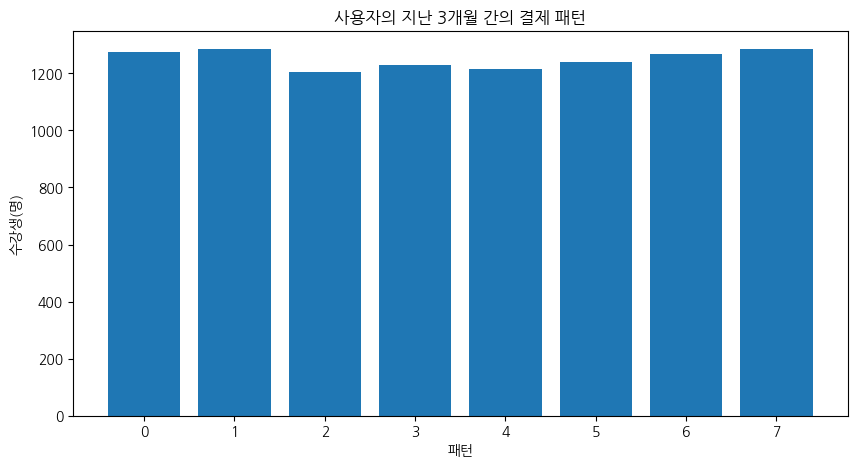

In [360]:
df['payment_pattern'].unique()
payment_pattern = df['payment_pattern'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(payment_pattern.index, payment_pattern.values)

#그래프 명
plt.title('사용자의 지난 3개월 간의 결제 패턴')

#그래프 x축 레이블
plt.xlabel('패턴')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(payment_pattern.index)

#그래프 출력
plt.show()

# target
* 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄
* 1 :   6199, 
0:   3801

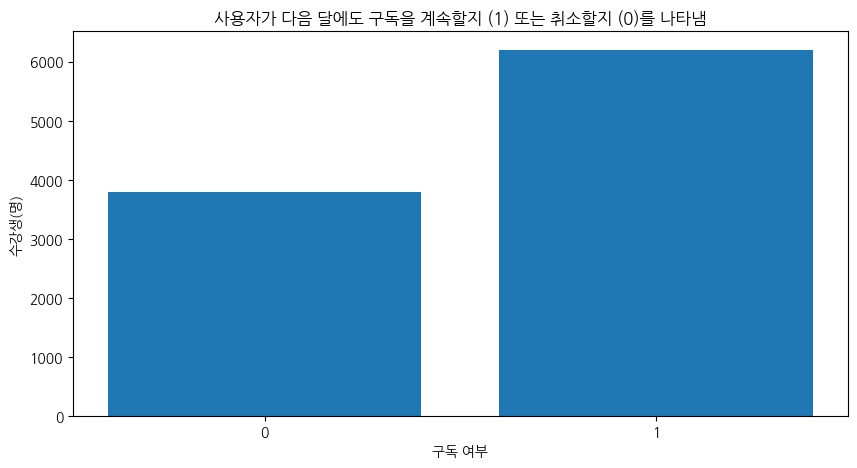

In [376]:
df['target'].unique()
target =df['target'].value_counts().sort_index()

plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(target.index, target.values)

#그래프 명
plt.title('사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄')

#그래프 x축 레이블
plt.xlabel('구독 여부')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(target.index)

#그래프 출력
plt.show()

# 상관 분석

In [421]:
"subscription_duration	recent_login_time	average_login_time	average_time_per_learning_session	monthly_active_learning_days	total_completed_courses	recent_learning_achievement	abandoned_learning_sessions	community_engagement_level	customer_inquiry_history\tsubscription_type_bool	payment_pattern	target".split("\t")

['subscription_duration',
 'recent_login_time',
 'average_login_time',
 'average_time_per_learning_session',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'abandoned_learning_sessions',
 'community_engagement_level',
 'customer_inquiry_history',
 'subscription_type',
 'payment_pattern',
 'target']

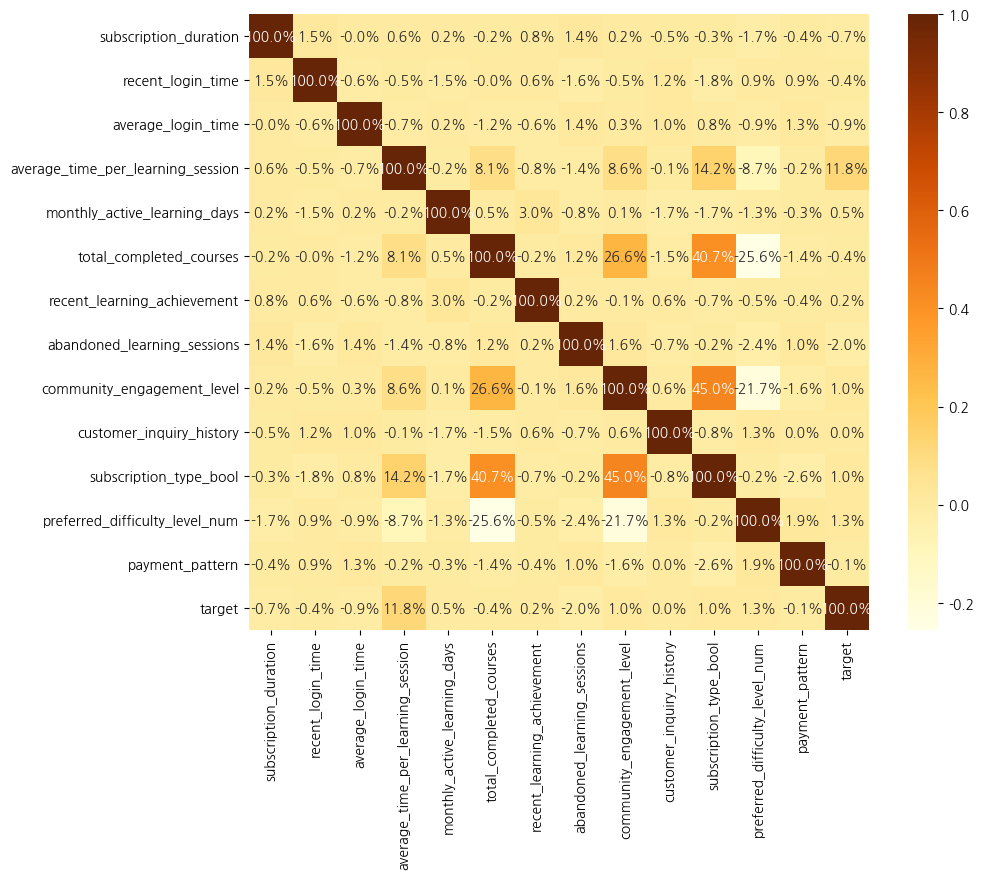

In [438]:
import seaborn as sns
df_c = df["subscription_duration	recent_login_time	average_login_time	average_time_per_learning_session	monthly_active_learning_days	total_completed_courses	recent_learning_achievement	abandoned_learning_sessions	community_engagement_level	customer_inquiry_history\tsubscription_type_bool\tpreferred_difficulty_level_num	payment_pattern	target".split("\t")]
corr=df_c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')

plt.show()

In [415]:
df['subscription_type_bool'] = df['subscription_type']!='Basic'

In [432]:
df['preferred_difficulty_level_num']=df['preferred_difficulty_level'].apply(lambda x : 0 if x=="Low" else ( 1 if x=="Medium" else 2 ) )

In [458]:
a_df=df.sort_values(by="user_id").reset_index()

In [460]:
b_df=a_df.reset_index()

In [462]:
b_df

,level_0,index,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,subscription_type_bool,preferred_difficulty_level_num
0,0,8254,00030dc2,18,28,19.907622,11.373221,10,15,61.765132,2,5,Low,Premium,2,3,0,True,0
1,1,1061,00058702,12,28,14.201342,25.325044,10,13,84.676719,8,5,Medium,Premium,0,6,1,True,1
2,2,8486,00076619,3,28,13.692835,6.452196,19,17,78.995991,4,2,High,Basic,2,6,1,False,2
3,3,3455,000a7fac,10,29,16.608599,94.417871,4,17,75.712102,4,5,Low,Premium,2,3,0,True,0
4,4,3865,00109fa1,11,24,21.025350,5.188833,19,12,73.553634,4,5,High,Basic,0,6,1,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,6102,ffcca840,19,2,15.904005,86.440590,10,14,74.699637,1,5,Low,Premium,3,3,0,True,0
9996,9996,8154,ffe5da30,12,12,7.324985,79.807193,15,15,70.224840,3,5,Low,Basic,7,7,1,False,0
9997,9997,5181,fff20cbb,6,15,12.768458,48.325353,10,12,69.129113,7,4,Low,Basic,2,5,0,False,0
9998,9998,5659,fff3144f,10,1,12.467311,5.454073,10,15,55.267751,5,4,Medium,Premium,2,0,1,True,1


In [960]:
df["payment_pattern1"] =(4<=df["payment_pattern"] )&(df["payment_pattern"]<=7)
df["payment_pattern2"] =(2==df["payment_pattern"] )|(df["payment_pattern"]==3)|(df["payment_pattern"]==6)
df["payment_pattern3"] =(1==df["payment_pattern"] )|(df["payment_pattern"]==3)|(df["payment_pattern"]==5)|(df["payment_pattern"]==7)



In [962]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,subscription_type_bool,preferred_difficulty_level_num,payment_pattern1,payment_pattern2,payment_pattern3
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,False,0,True,False,True
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,False,1,True,True,False
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,True,1,True,False,True
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,False,0,False,False,False
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,False,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,True,0,False,False,True
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,False,1,True,False,True
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,False,2,True,True,False
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1,False,0,False,False,False


In [968]:
df['preferred_difficulty_level_low'] = df['preferred_difficulty_level'] == 'Low'
df['preferred_difficulty_level_medium'] = df['preferred_difficulty_level'] == 'Medium'
df['preferred_difficulty_level_high'] = df['preferred_difficulty_level'] == 'High'




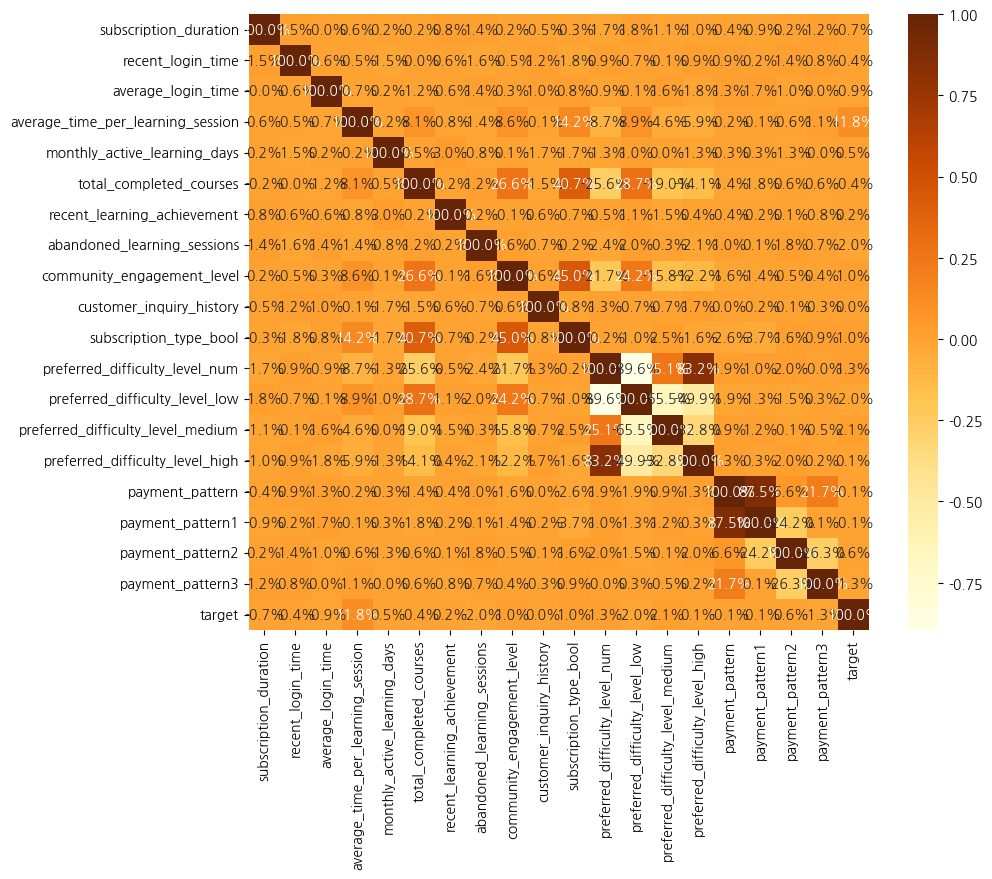

In [970]:
#user_id 순서하고 상관없음
import seaborn as sns



df_c = df[[
 'subscription_duration',
 'recent_login_time',
 'average_login_time',
 'average_time_per_learning_session',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'abandoned_learning_sessions',
 'community_engagement_level',
 'customer_inquiry_history',
 'subscription_type_bool',
 'preferred_difficulty_level_num',
 'preferred_difficulty_level_low',
 'preferred_difficulty_level_medium',
 'preferred_difficulty_level_high',
 'payment_pattern',
 'payment_pattern1',
 'payment_pattern2',
 'payment_pattern3',
 'target']]
corr=df_c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')

plt.show()

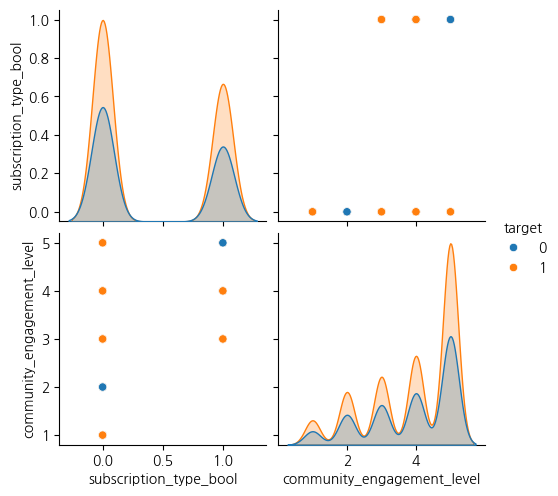

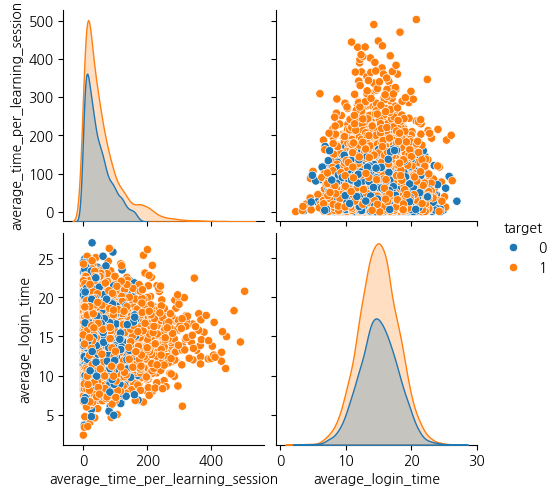

In [498]:
sns.pairplot(df[["average_time_per_learning_session","average_login_time","target"]], hue="target" )
plt.title("")
plt.show()

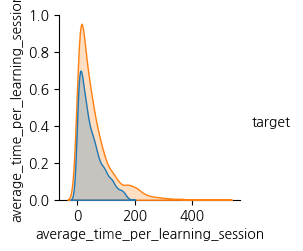

In [489]:
sns.pairplot(df[["average_time_per_learning_session","target"]], hue="target" )
plt.title("")
plt.show()

# average_time_per_learning_session : 다음에 구독 취소하는 사람은 session 마다 평균 수강율이 떨어진다.

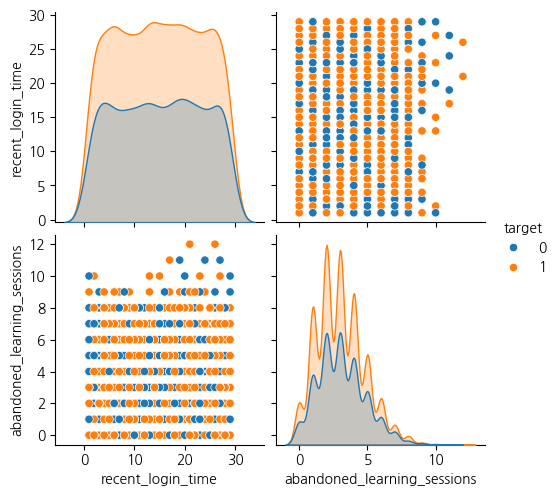

In [567]:
sns.pairplot(df[["recent_login_time","abandoned_learning_sessions","target"]], hue="target" )
plt.title("")
plt.show()

# 마지막 recent_login_time 클 수록 그만둔 세션 수가 많다.  

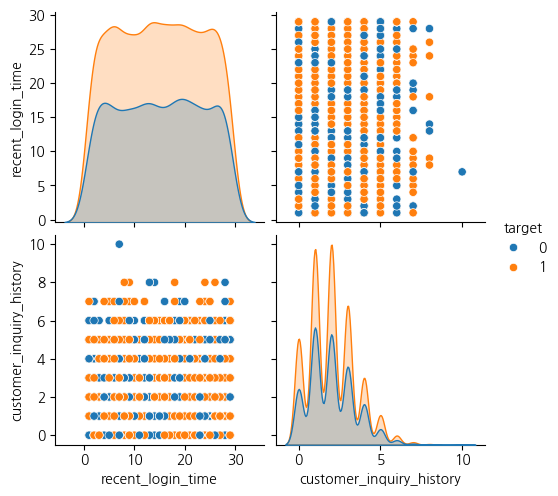

# 탐색 1: 구독유형 Basic 은 결제를 하나??

In [588]:
df[(df['subscription_type']=="Basic")&(df['payment_pattern']==7)&(df['target']==1)]

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,subscription_type_bool,preferred_difficulty_level_num
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1,False,1
67,e1b0bcb9,7,14,10.623112,39.855390,8,11,69.000758,3,2,Medium,Basic,2,7,1,False,1
79,3c9208b9,5,25,15.563864,97.234530,10,13,64.448753,3,5,High,Basic,3,7,1,False,2
80,99bc71cb,7,10,17.255549,21.239569,14,7,67.752942,3,3,Medium,Basic,2,7,1,False,1
105,f4bde835,18,29,17.079093,19.053212,12,8,88.044387,1,5,High,Basic,0,7,1,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,c9b03e08,21,15,15.728651,85.667285,24,17,69.128609,1,2,Low,Basic,1,7,1,False,0
9908,6497fdbf,17,25,13.053175,164.229621,4,17,82.598710,3,4,Low,Basic,0,7,1,False,0
9931,982ca1c0,23,21,18.121018,30.359489,17,10,72.870869,6,4,High,Basic,1,7,1,False,2
9938,065d8979,14,18,9.820772,197.018715,14,12,68.036611,1,3,Low,Basic,4,7,1,False,0


In [595]:
df[(df['subscription_type']=="Basic")&(df['payment_pattern']==0)&(df['target']==0)]

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,subscription_type_bool,preferred_difficulty_level_num
37,5ae7bf2c,15,9,17.605663,50.144911,15,8,104.157237,2,3,Medium,Basic,2,0,0,False,1
44,0fe59afd,21,28,18.289734,2.921134,19,2,73.902186,5,3,High,Basic,1,0,0,False,2
46,5838d23e,12,4,13.750141,21.624834,21,8,83.770941,3,3,Low,Basic,1,0,0,False,0
95,3c3496a0,22,3,13.066075,14.356539,24,15,83.085495,5,2,High,Basic,0,0,0,False,2
120,8bc1cb9f,19,13,12.233601,118.676610,7,5,70.348609,2,5,Medium,Basic,2,0,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,cc6ab8d6,4,7,12.030509,136.543540,4,11,74.480307,1,5,Low,Basic,4,0,0,False,0
9942,ca7acd34,19,7,12.079553,13.587477,11,16,79.307694,5,4,Low,Basic,0,0,0,False,0
9950,c6d98b50,21,12,14.896086,1.932433,14,9,69.402357,4,5,Medium,Basic,2,0,0,False,1
9969,1aad9084,11,19,16.515601,137.430127,11,11,79.822459,2,2,Low,Basic,3,0,0,False,0


# 탐색 내용 : 
* Basic 유형도 결제를 하는 유형이다.
    * 결제 패턴이 0이고 다음달 구독 0인데도 Basic인 경우가 있다.
    * 1 년 구독일 수 있다.
* Basic 유형은 결제를 안 하는 유형이다.
    * 결제 패턴 7 이고 다음달 구독 1 인 경우가 Basic 유형에 있기 때문에 문제가 있다.

# 탐색: 구독과 결제의 관계는?

In [608]:
df[(df['subscription_type']=="Premium")&(df['payment_pattern']==0)]

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,subscription_type_bool,preferred_difficulty_level_num
12,25c57932,7,22,15.392561,176.304779,16,10,69.100850,4,5,High,Premium,2,0,1,True,2
87,d2988c42,21,10,7.810088,32.344656,1,14,72.530064,3,4,Low,Premium,2,0,1,True,0
89,0d9258de,15,13,15.345679,91.899531,21,15,52.811293,1,4,Low,Premium,2,0,1,True,0
97,c6ea3ffe,17,2,16.935862,16.784777,15,16,85.872622,2,5,Medium,Premium,2,0,1,True,1
138,c3f6a880,12,17,17.591094,17.840971,15,11,76.549460,8,5,Low,Premium,2,0,0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,1fc8cfda,14,10,13.524934,3.933372,9,15,79.430973,5,3,Medium,Premium,4,0,1,True,1
9887,6209cb12,21,3,16.346370,10.352990,5,11,70.385613,2,4,Medium,Premium,0,0,1,True,1
9918,63e22f0c,16,20,14.049006,2.495758,1,12,87.490777,2,5,Low,Premium,1,0,1,True,0
9922,89de06f2,11,27,20.993574,184.597755,2,18,68.721716,1,4,Low,Premium,3,0,1,True,0


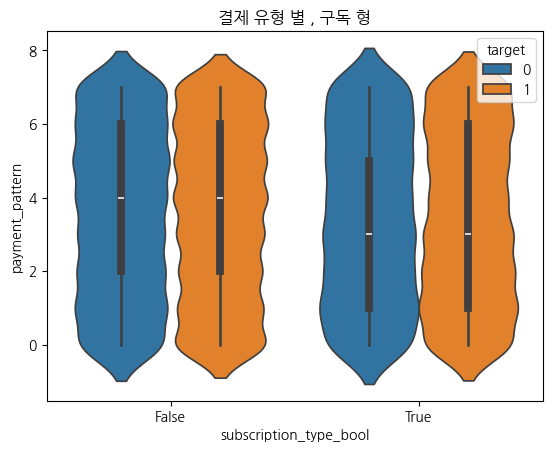

In [657]:
sns.violinplot(y="payment_pattern", x="subscription_type_bool", hue="target", data=df[["payment_pattern","subscription_type_bool","target"]])
plt.title("결제 유형 별 , 구독 형")
plt.show()

# 탐색2 결론 : 구독과 결제는 관계가 없다.

In [669]:

df[df['subscription_type']=="Basic"]




,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,subscription_type_bool,preferred_difficulty_level_num
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,True,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,Low,Premium,1,1,1,True,0
11,b8696d56,5,28,18.474545,117.134599,9,9,97.786237,6,3,Medium,Premium,2,3,0,True,1
12,25c57932,7,22,15.392561,176.304779,16,10,69.100850,4,5,High,Premium,2,0,1,True,2
16,d35c46d7,8,19,12.355991,18.753933,19,13,87.810688,1,5,High,Premium,2,1,0,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,365dc677,22,20,16.104762,33.315978,11,17,55.935378,2,5,Low,Premium,2,5,1,True,0
9992,5bb80449,19,4,13.105111,100.630340,1,12,82.762566,5,5,Low,Premium,1,7,1,True,0
9993,1d959e91,7,29,16.165190,84.130016,14,14,78.348380,4,5,Low,Premium,1,6,1,True,0
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,True,0


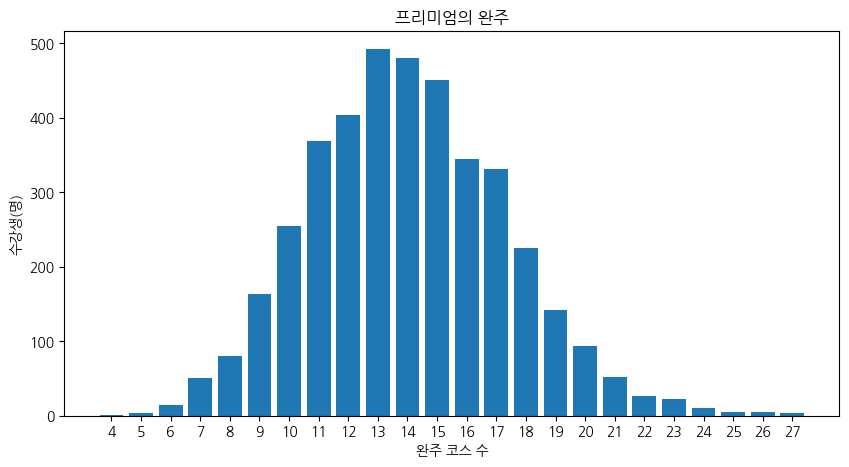

In [776]:
aaaa = df[df['subscription_type']=="Premium"]
aaaa=aaaa["total_completed_courses"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(aaaa.index, aaaa.values)

#그래프 명
plt.title('프리미엄의 완주')

#그래프 x축 레이블
plt.xlabel('완주 코스 수')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(aaaa.index)

#그래프 출력
plt.show()

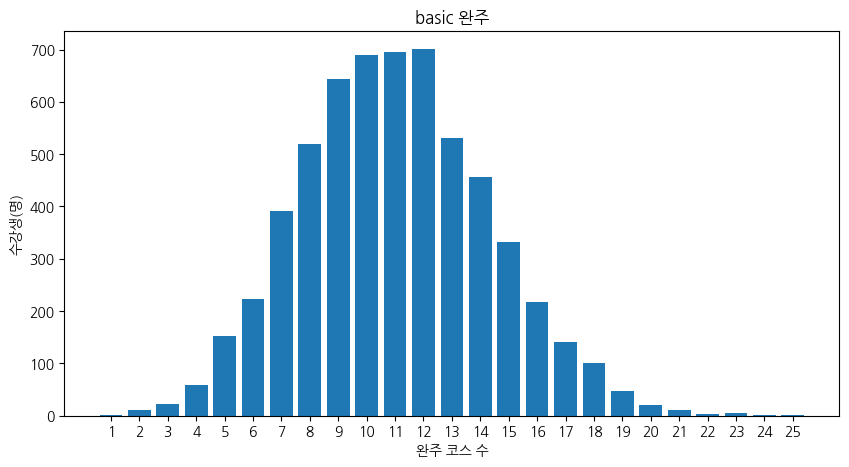

In [778]:
bbbb = df[df['subscription_type']=="Basic"]
bbbb=bbbb["total_completed_courses"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(bbbb.index, bbbb.values)

#그래프 명
plt.title('basic 완주')

#그래프 x축 레이블
plt.xlabel('완주 코스 수')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(bbbb.index)

#그래프 출력
plt.show()

# 다음에 구독 취소하는 사람은 session 마다 평균 수강 시간이 낮다.

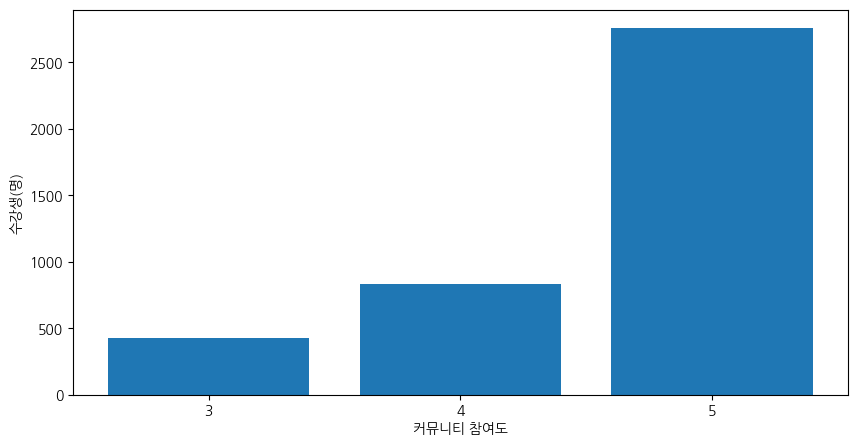

In [784]:
aaaa1 = df[df['subscription_type']=="Premium"]
aaaa1=aaaa1["community_engagement_level"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(aaaa1.index, aaaa1.values)

#그래프 명
plt.title('')

#그래프 x축 레이블
plt.xlabel('커뮤니티 참여도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(aaaa1.index)

#그래프 출력
plt.show()

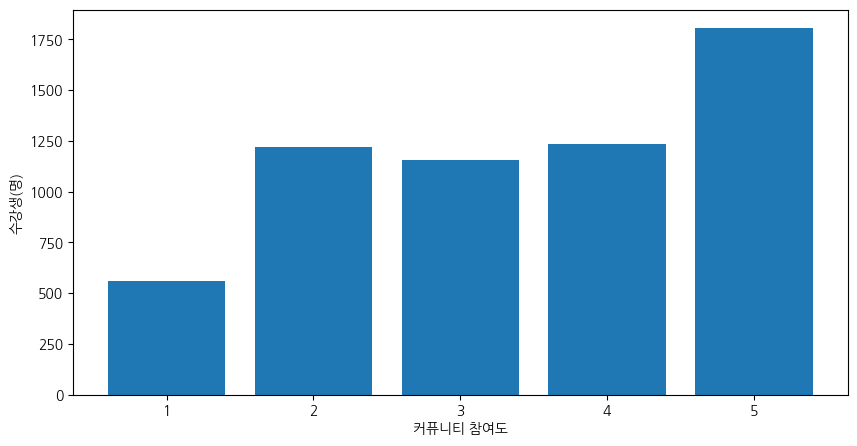

In [788]:
bbbb1 = df[df['subscription_type']=="Basic"]
bbbb1=bbbb1["community_engagement_level"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(bbbb1.index, bbbb1.values)

#그래프 명
plt.title('')

#그래프 x축 레이블
plt.xlabel('커퓨니티 참여도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(bbbb1.index)

#그래프 출력
plt.show()

# 프리미엄 구독자는 커뮤니티 참여도가 더 높다

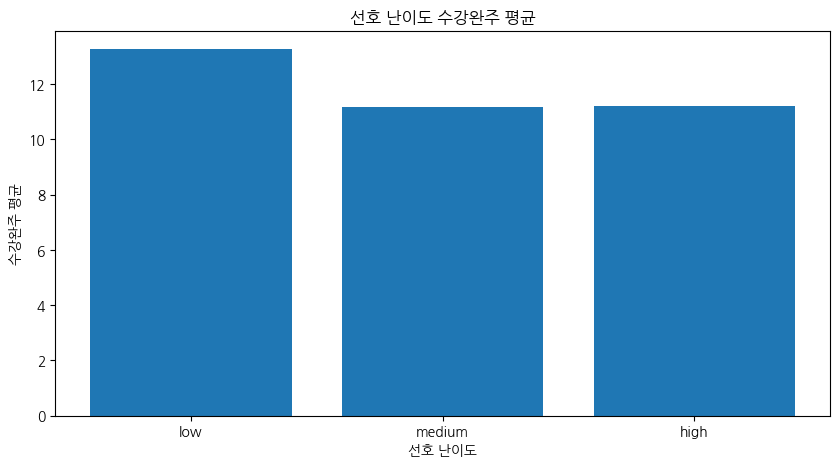

In [814]:
#그래프 사이즈
plt.figure(figsize=(10,5))
l = (df[df['preferred_difficulty_level']=="Low"]["total_completed_courses"].mean(), df[df['preferred_difficulty_level']=="Medium"]["total_completed_courses"].mean(),df[df['preferred_difficulty_level']=="High"]["total_completed_courses"].mean())
#그래프 x축 y축
plt.bar(["low","medium","high"], l)

#그래프 명
plt.title('선호 난이도 수강완주 평균')

#그래프 x축 레이블
plt.xlabel('선호 난이도')

#그래프 y축 레이블
plt.ylabel('수강완주 평균')

#x축 레이블을
plt.xticks(["low","medium","high"])

#그래프 출력
plt.show()

# 난이도가 낮은 것을 선호 할 수로 수강완주 수가 높다.

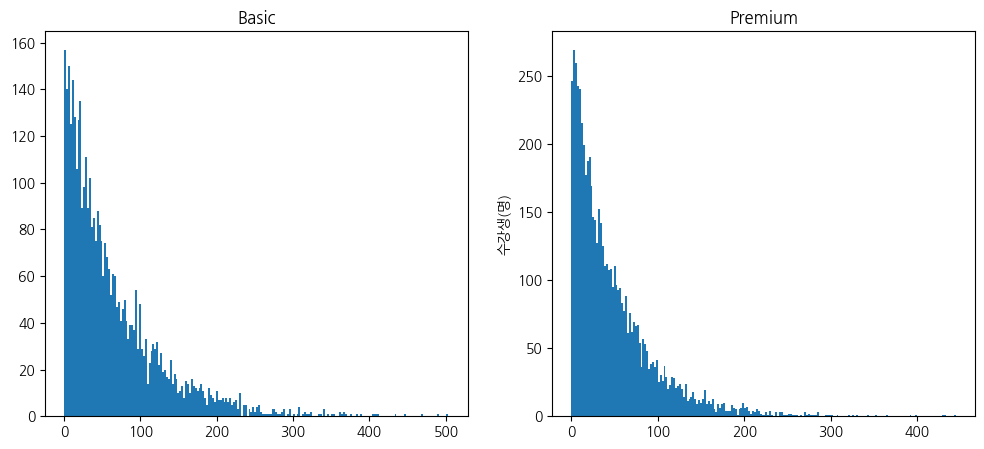

In [891]:
bbbbk = df[df['subscription_type']=="Basic"]
bbbbr = df[df['subscription_type']=="Premium"]

#그래프 사이즈
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(bbbbr["average_time_per_learning_session"], bins=200)
ax1.set_title("Basic")
ax2.hist(bbbbk["average_time_per_learning_session"], bins=200)
ax2.set_title("Premium")
#그래프 y축 레이블
plt.ylabel('수강생(명)')

plt.show()



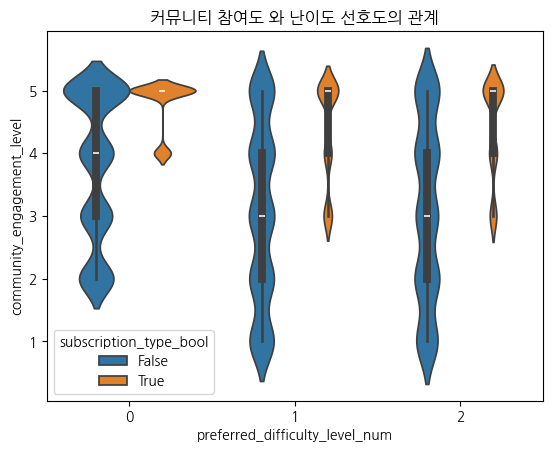

In [895]:
sns.violinplot(y="community_engagement_level", x="preferred_difficulty_level_num", hue="subscription_type_bool", data=df[["community_engagement_level","preferred_difficulty_level_num","subscription_type_bool"]])
plt.title("커뮤니티 참여도 와 난이도 선호도의 관계")
plt.show()

# 난이도가 낮은 것을 선호하는 사람의 커뮤니티 참여도가 높다

# 탐색 결론 1 : 프리미엄 구독자는 커뮤니티 참여도가 더 높다.

# 탐색 결론 2 :   프리미엄 구독자는 베이직 구독자에 비해 완주 확률이 더 높다.

# 탐색 결론 3 :   session 평균 수강 시간이 이상적으로 많이 높은 사람은 구독 유지한다.

# 탐색 결론 4 : 난이도가 낮은 것을 선호하는 사람의 수강완주 수가 높다.

# 탐색 결론 5 : 난이도가 낮은 것을 선호하는 사람의 커뮤니티 참여도가 높다

# 탐색 결론 6 : 프리미엄 구독자 일수록 세션 평균 수강시간이 높은 사람이 더 존재한다.

# 가설1 : 난이도가 낮아서 세션 수강시간이 적은것 아닐까?

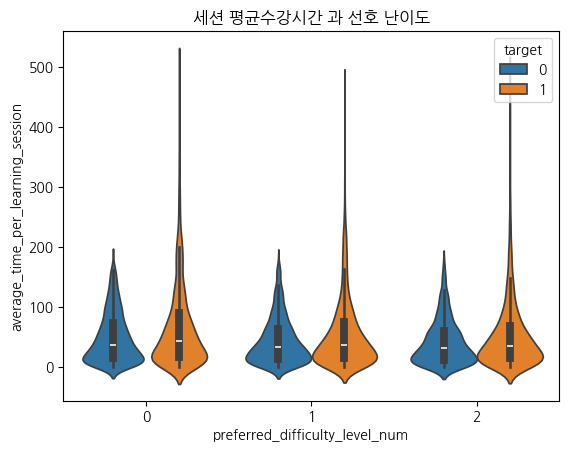

In [839]:
sns.violinplot(y="average_time_per_learning_session", x="preferred_difficulty_level_num", hue="target", data=df[["average_time_per_learning_session","preferred_difficulty_level_num","target"]])
plt.title("세션 평균수강시간 과 선호 난이도")
plt.show()

# 가설 검증 : 무의미 한것으로 보인다.

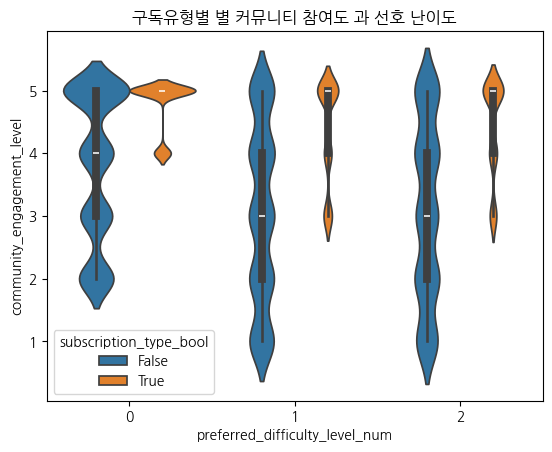

In [937]:
# 가설 2 : 

sns.violinplot(y="community_engagement_level", x="preferred_difficulty_level_num", hue="subscription_type_bool", data=df[["community_engagement_level","preferred_difficulty_level_num","subscription_type_bool"]])
plt.title("구독유형별 별 커뮤니티 참여도 과 선호 난이도")
plt.show()

# 프리미엄은 참여도가 높으며 특히 쉬운 난이도를 선호 할 수록 더 참여도가 높다.
# 베이직 또한 쉬운 난이도를 선호하는 사람이 참여도가 더 높다.


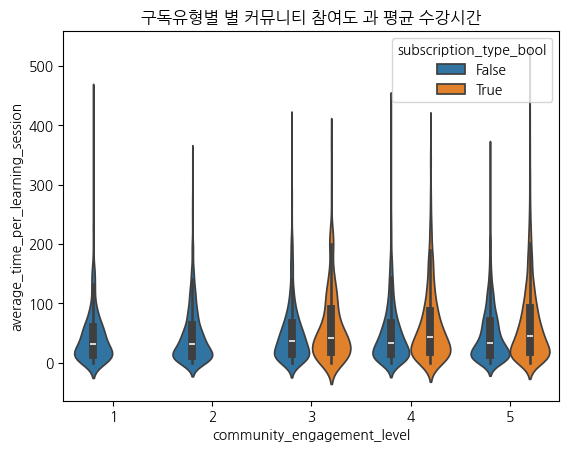

In [944]:
sns.violinplot(y="average_time_per_learning_session", x="community_engagement_level", hue="subscription_type_bool", data=df[["community_engagement_level","average_time_per_learning_session","subscription_type_bool"]])
plt.title("구독유형별 별 커뮤니티 참여도 과 평균 수강시간")
plt.show()

# 프리미엄 일수록 평균 수강시간이 높은 사람이 더 존재한다.

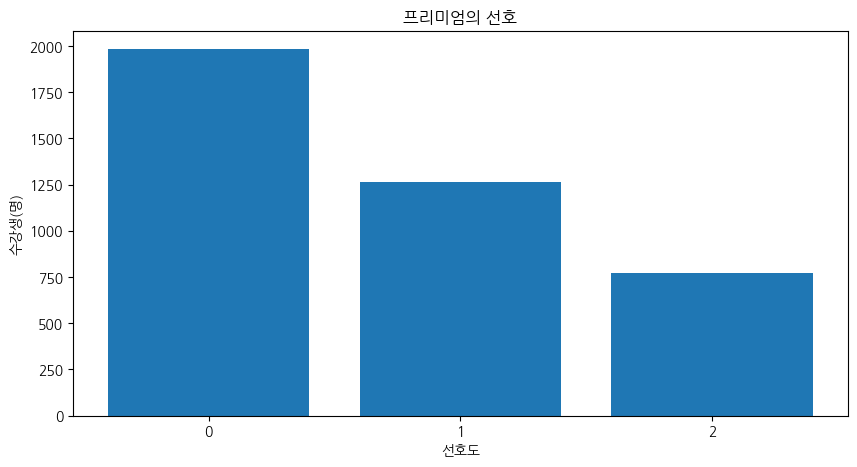

In [917]:
aaaa = df[df['subscription_type']=="Premium"]
aaaa=aaaa["preferred_difficulty_level_num"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(aaaa.index, aaaa.values)

#그래프 명
plt.title('프리미엄의 선호')

#그래프 x축 레이블
plt.xlabel('선호도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(aaaa.index)

#그래프 출력
plt.show()

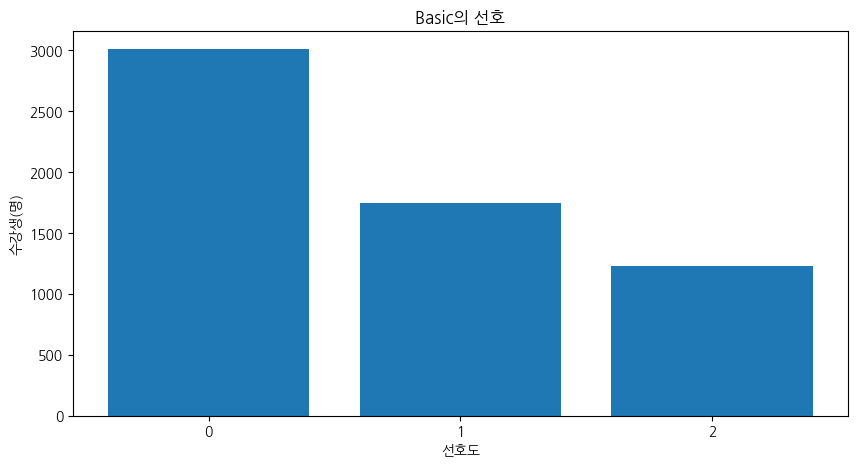

In [915]:
aaaa = df[df['subscription_type']=="Basic"]
aaaa=aaaa["preferred_difficulty_level_num"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(aaaa.index, aaaa.values)

#그래프 명
plt.title('Basic의 선호')

#그래프 x축 레이블
plt.xlabel('선호도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(aaaa.index)

#그래프 출력
plt.show()

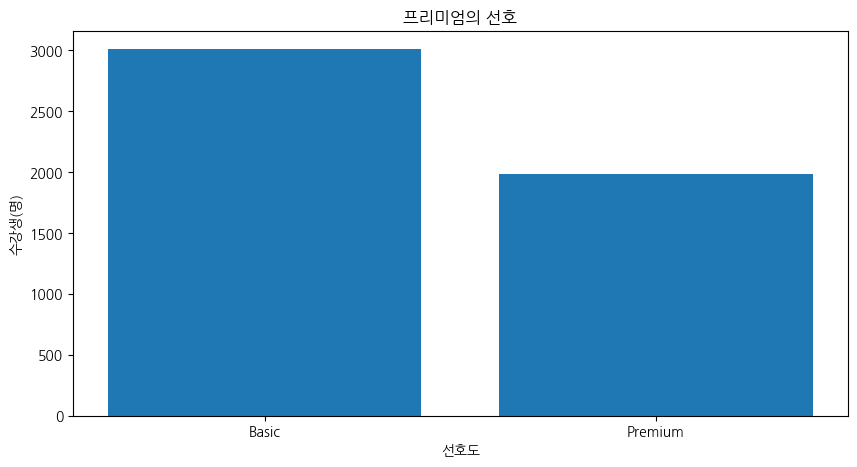

0.6590229312063809

In [933]:
aaaa = df[df['preferred_difficulty_level_num']==0]
aaaa=aaaa["subscription_type"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(aaaa.index, aaaa.values)

#그래프 명
plt.title('프리미엄의 선호')

#그래프 x축 레이블
plt.xlabel('선호도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(aaaa.index)

#그래프 출력
plt.show()
aaaa.values[1]/aaaa.values[0]

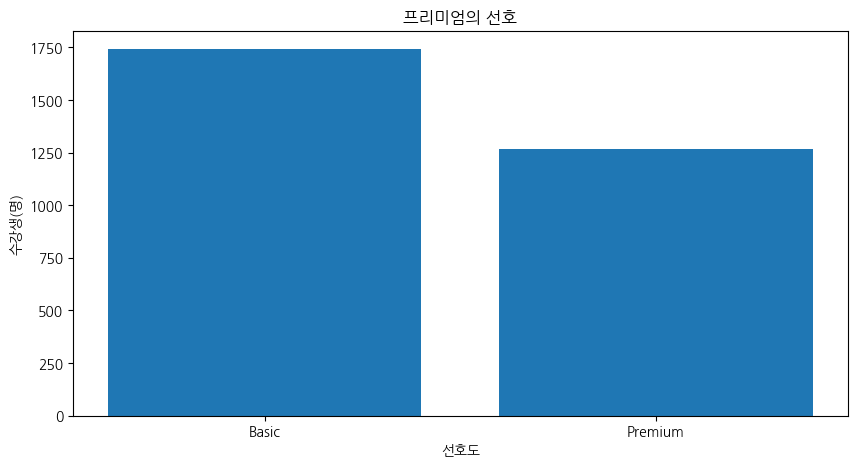

0.7267508610792193

In [931]:
aaaa = df[df['preferred_difficulty_level_num']==1]
aaaa=aaaa["subscription_type"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(aaaa.index, aaaa.values)

#그래프 명
plt.title('프리미엄의 선호')

#그래프 x축 레이블
plt.xlabel('선호도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(aaaa.index)

#그래프 출력
plt.show()
aaaa.values[1]/aaaa.values[0]

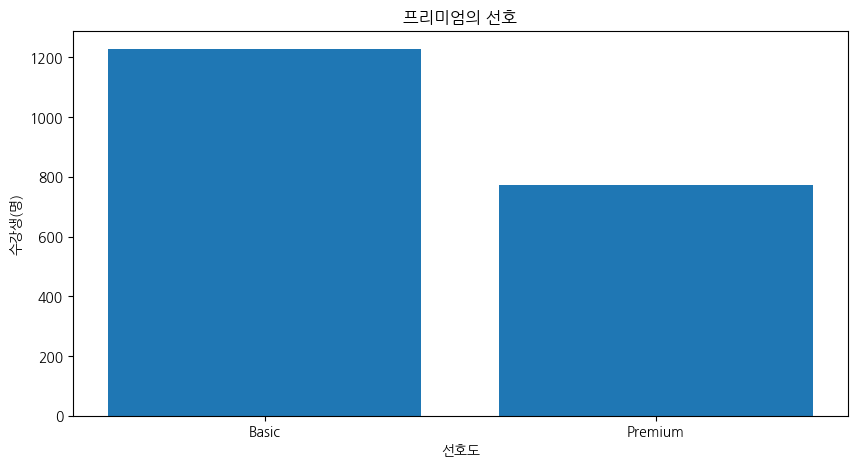

0.6286644951140065

In [929]:
aaaa = df[df['preferred_difficulty_level_num']==2]
aaaa=aaaa["subscription_type"].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(aaaa.index, aaaa.values)

#그래프 명
plt.title('프리미엄의 선호')

#그래프 x축 레이블
plt.xlabel('선호도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(aaaa.index)

#그래프 출력
plt.show()
aaaa.values[1]/aaaa.values[0]

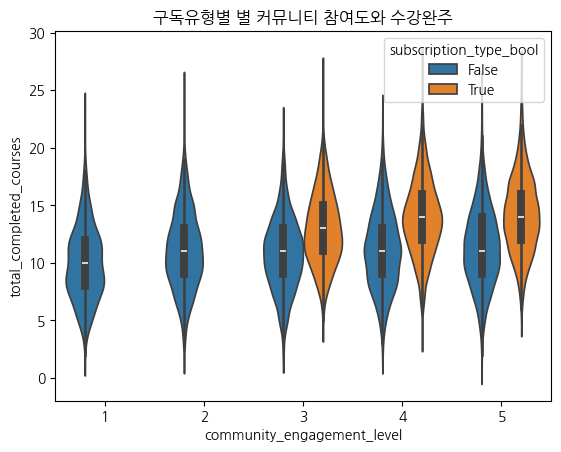

In [978]:
sns.violinplot(y="total_completed_courses", x="community_engagement_level", hue="subscription_type_bool", data=df[["community_engagement_level","total_completed_courses","subscription_type_bool"]])
plt.title("구독유형별 별 커뮤니티 참여도와 수강완주")
plt.show()

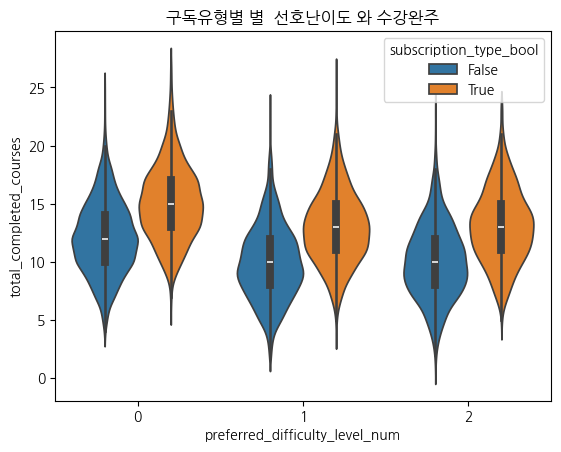

In [984]:
sns.violinplot(y="total_completed_courses", x="preferred_difficulty_level_num", hue="subscription_type_bool", data=df[["preferred_difficulty_level_num","total_completed_courses","subscription_type_bool"]])
plt.title("구독유형별 별  선호난이도 와 수강완주")
plt.show()

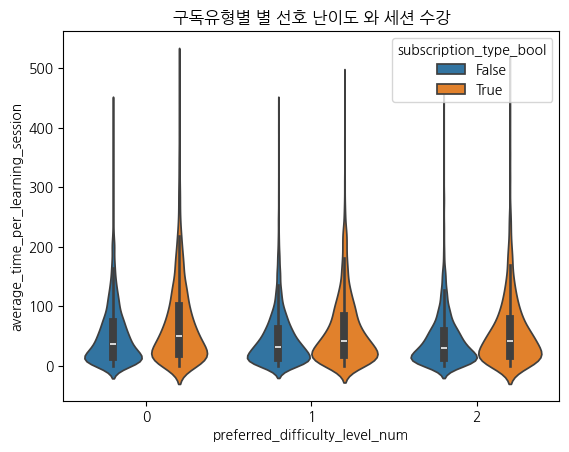

In [982]:
sns.violinplot(y="average_time_per_learning_session", x="preferred_difficulty_level_num", hue="subscription_type_bool", data=df[["preferred_difficulty_level_num","average_time_per_learning_session","subscription_type_bool"]])
plt.title("구독유형별 별 선호 난이도 와 세션 수강")
plt.show()

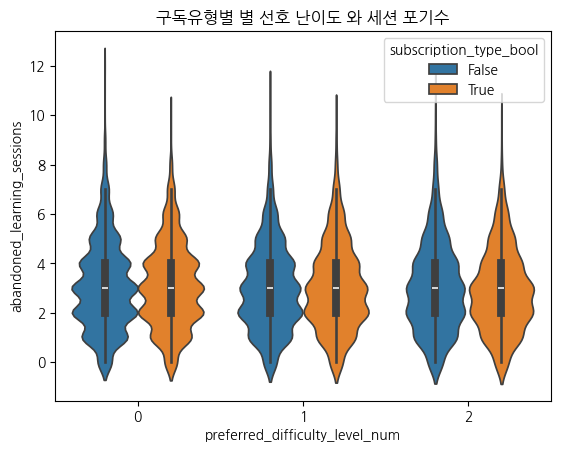

In [986]:
sns.violinplot(y="abandoned_learning_sessions", x="preferred_difficulty_level_num", hue="subscription_type_bool", data=df[["preferred_difficulty_level_num","abandoned_learning_sessions","subscription_type_bool"]])
plt.title("구독유형별 별 선호 난이도 와 세션 포기수")
plt.show()

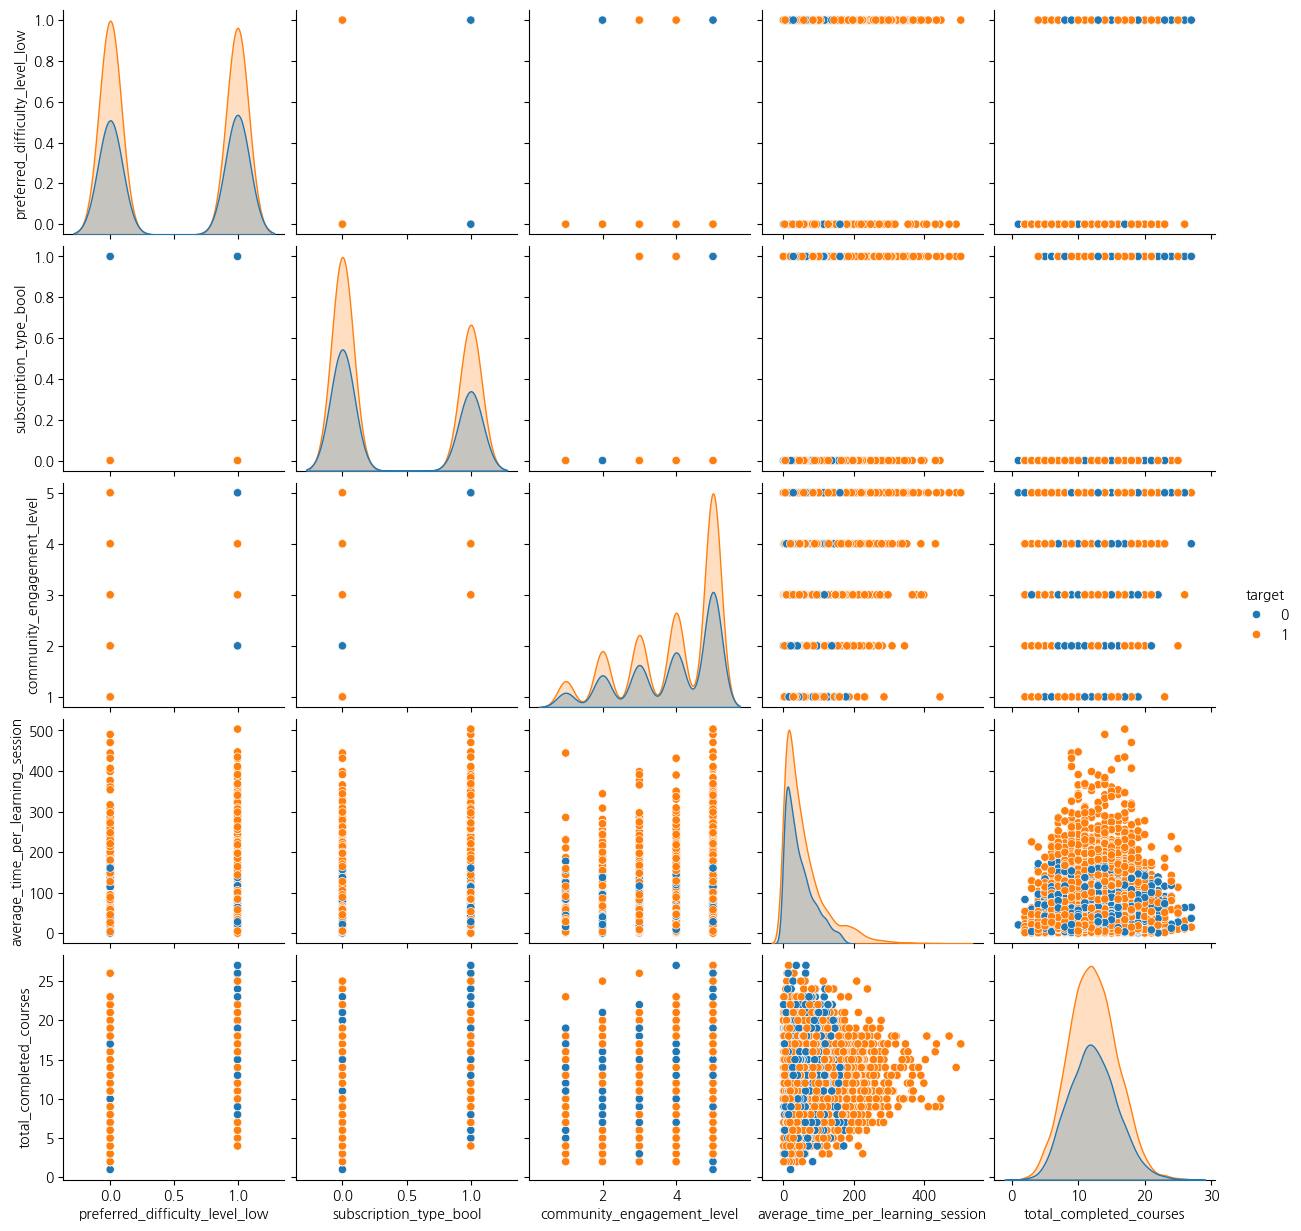

In [988]:
sns.pairplot(df[["preferred_difficulty_level_low","subscription_type_bool","community_engagement_level","average_time_per_learning_session","target","total_completed_courses"]], hue="target" )
plt.title("")
plt.show()

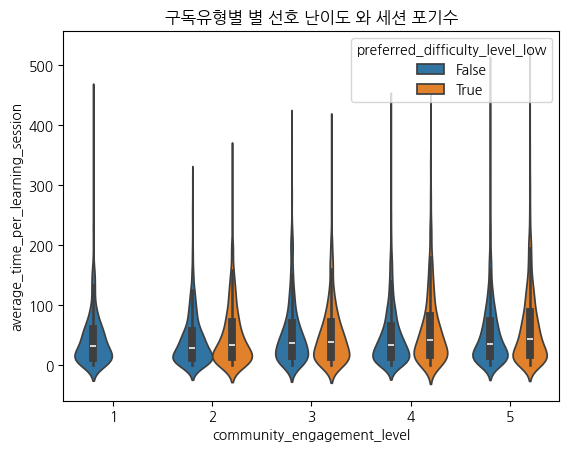

In [1004]:
sns.violinplot(y="average_time_per_learning_session", x="community_engagement_level", hue="preferred_difficulty_level_low", data=df[["community_engagement_level","subscription_type_bool","target","average_time_per_learning_session","preferred_difficulty_level_low"]])
plt.title("낮은 난이도 선호 여부 별 평균 세션 이용 시간 와 참여도")
plt.show()

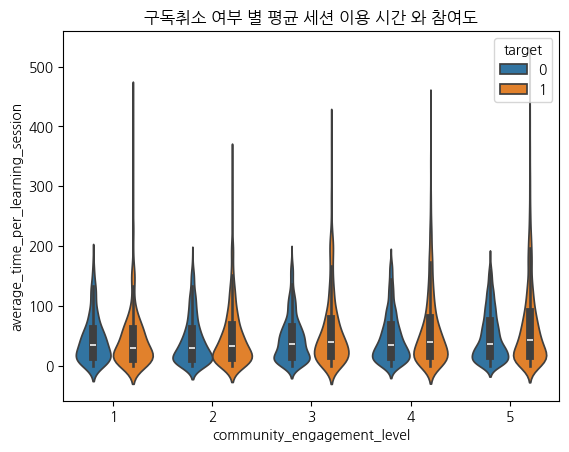

In [1015]:
sns.violinplot(y="average_time_per_learning_session", x="community_engagement_level", hue="target", data=df[["community_engagement_level","subscription_type_bool","target","average_time_per_learning_session","preferred_difficulty_level_low"]])
plt.title("구독취소 여부 별 평균 세션 이용 시간 와 참여도")
plt.show()

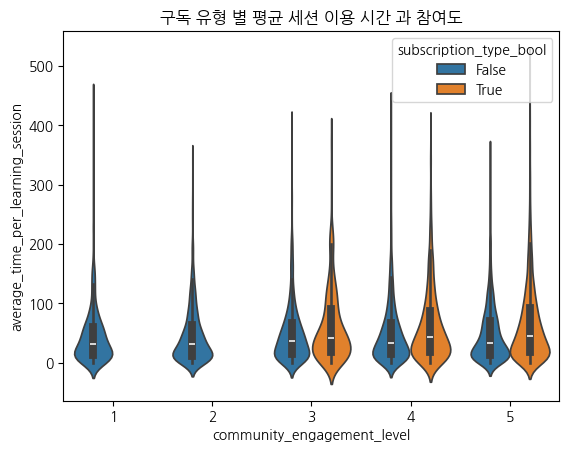

In [1017]:
sns.violinplot(y="average_time_per_learning_session", x="community_engagement_level", hue="subscription_type_bool", data=df[["community_engagement_level","subscription_type_bool","target","average_time_per_learning_session","preferred_difficulty_level_low"]])
plt.title("구독 유형 별 평균 세션 이용 시간 과 참여도")
plt.show()

# 탐색결론 7: basic 유저이며 쉬운 걸 선호하지 않고 커뮤니티 활동이 저조한 사람 중에는 유독 길게 세션을 듣는 사람이 있다.

#  길게 들을 수록 구독이 유지된다?

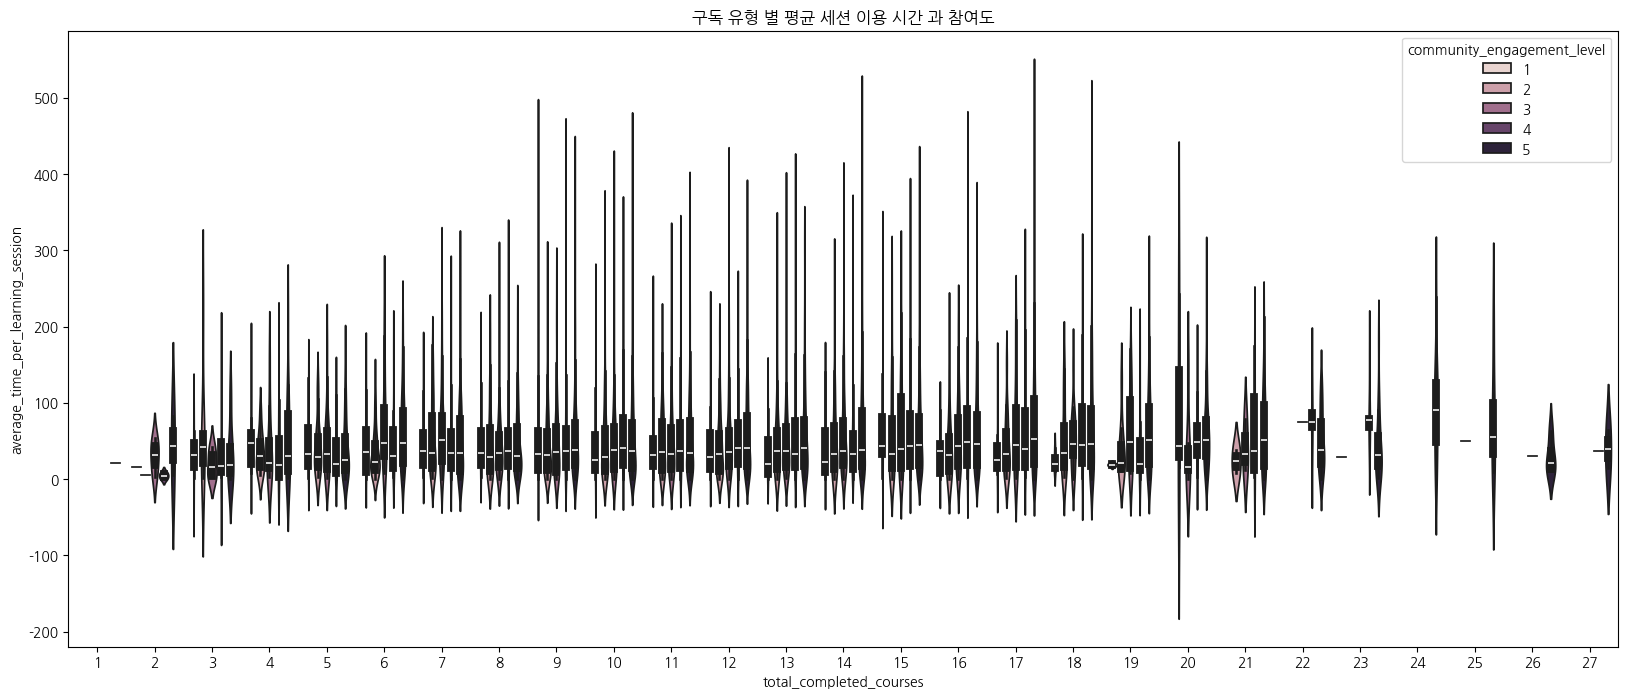

In [1046]:
plt.figure(figsize=(20, 8))
sns.violinplot(y="average_time_per_learning_session", x="total_completed_courses", hue="community_engagement_level", data=df[["community_engagement_level","subscription_type_bool","target","average_time_per_learning_session","preferred_difficulty_level_low","total_completed_courses"]])
plt.title("구독 유형 별 평균 세션 이용 시간 과 참여도")
plt.show()

In [1040]:
ddf=df[df['average_time_per_learning_session'] >200]

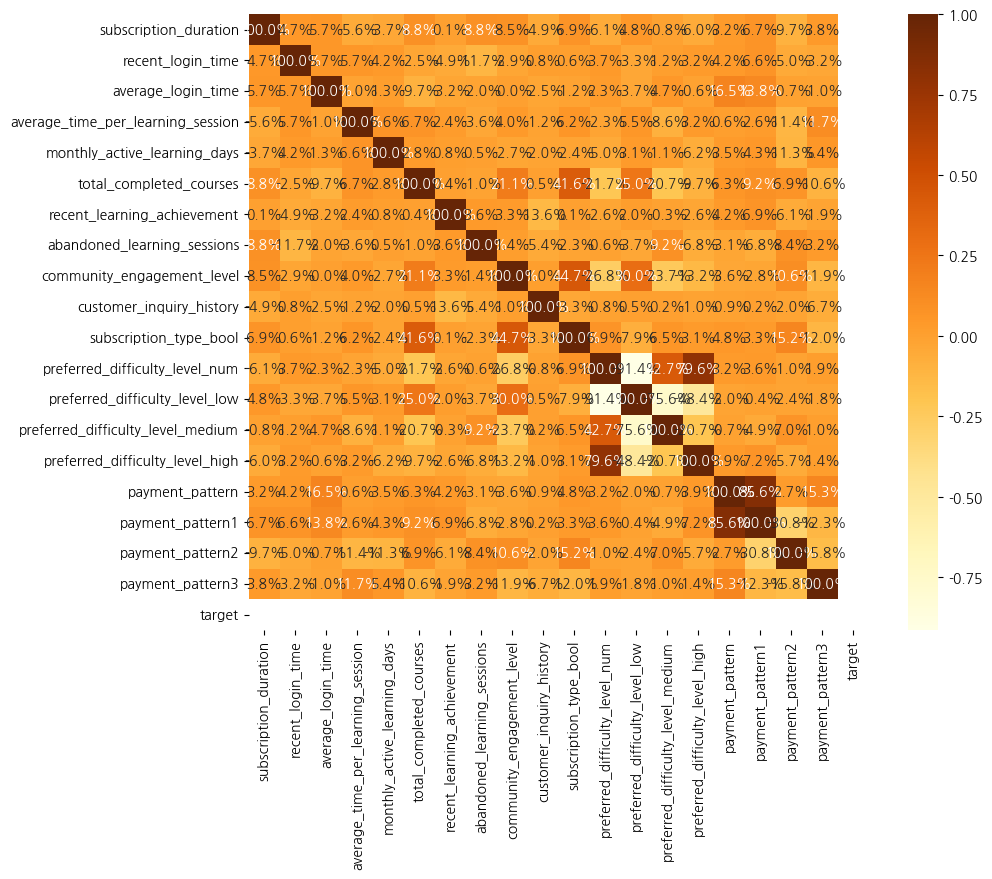

In [1042]:
import seaborn as sns



df_c = ddf[[
 'subscription_duration',
 'recent_login_time',
 'average_login_time',
 'average_time_per_learning_session',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'abandoned_learning_sessions',
 'community_engagement_level',
 'customer_inquiry_history',
 'subscription_type_bool',
 'preferred_difficulty_level_num',
 'preferred_difficulty_level_low',
 'preferred_difficulty_level_medium',
 'preferred_difficulty_level_high',
 'payment_pattern',
 'payment_pattern1',
 'payment_pattern2',
 'payment_pattern3',
 'target']]
corr=df_c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')

plt.show()

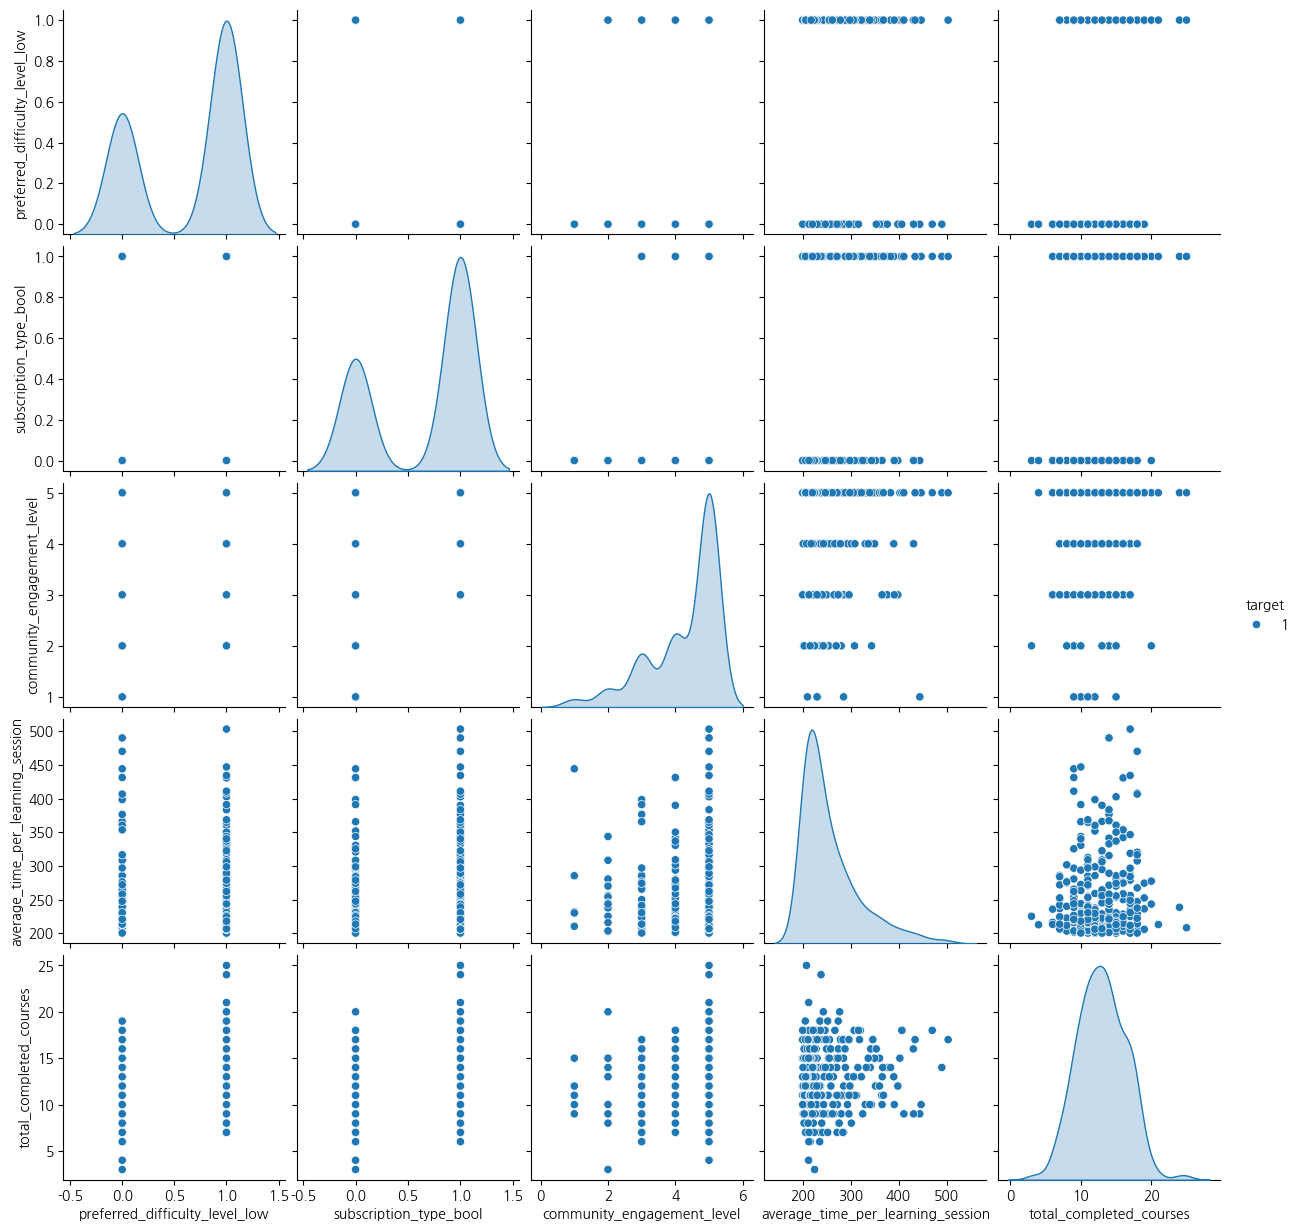

In [1052]:
sns.pairplot(ddf[["preferred_difficulty_level_low","subscription_type_bool","community_engagement_level","average_time_per_learning_session","target","total_completed_courses"]], hue="target" )
plt.title("")
plt.show()

# 탐색 7 : 커뮤니티 참여도가 높을 수록 평균 수강 시간이 올라간다.(세션 200이상 데이터 내 탐색)

In [ ]:
결론 커뮤니티 참여도를 높여서 수강시간을 올리면 구독을